In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


 Attribute Information
 1) age
 
 2) sex ( 1: male, 0: female )
 
 3) chest pain type (4 values)
 
 4) resting blood pressure
 
 5) serum cholestoral in mg/dl
 
 6) fasting blood sugar > 120 mg/dl
 
 7) resting electrocardiographic results (values 0,1,2)
 
 8) maximum heart rate achieved
 
 9) exercise induced angina
 
 10) oldpeak = ST depression induced by exercise relative to rest
 
 11) the slope of the peak exercise ST segment
 
 12) number of major vessels (0-3) colored by flourosopy
 
 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
 
 14) target: 0= less chance of heart attack 1= more chance of heart attack

In [4]:
df.shape

(303, 14)

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Target: Tagged as 1 (risky), 0 (normal) 

### Checking duplicate values

In [7]:
df.duplicated().sum()

1

In [8]:
# df.drop_duplicates(inplace = True)

### Data Analysis (countplot, histograms, correlation heatmap, boxenplot)

[Text(0, 0, '138'), Text(0, 0, '165')]

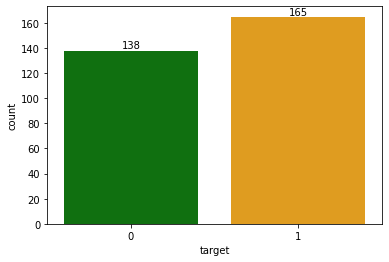

In [9]:
ax = sns.countplot(data = df, x = 'target', palette = ['green', 'orange', 'red'])
ax.bar_label(ax.containers[0])

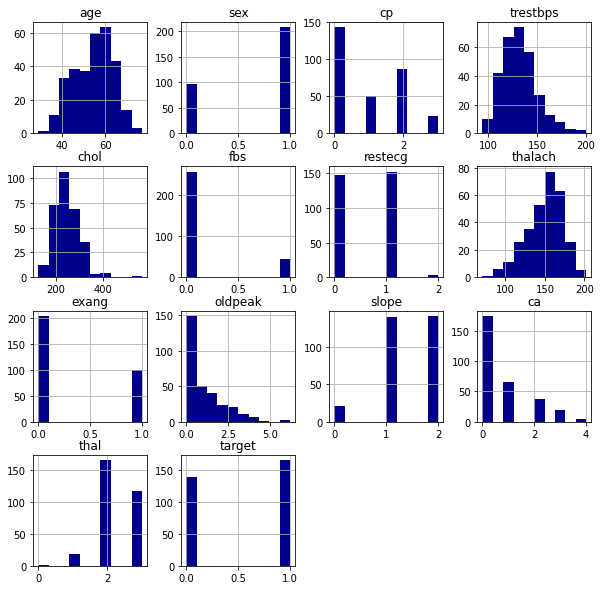

In [10]:
df.hist(figsize = (10, 10), color = 'darkblue')
plt.show()

<AxesSubplot: >

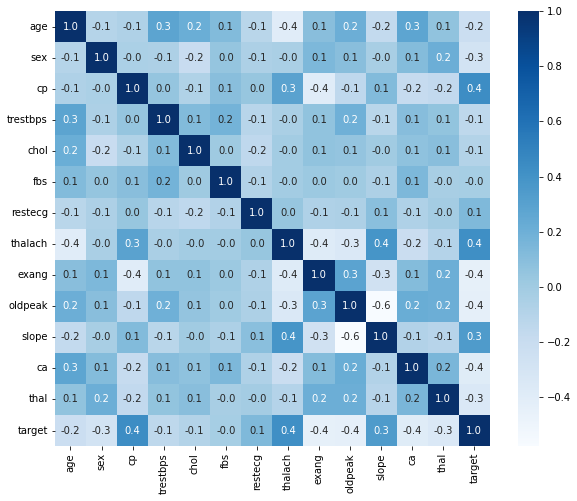

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), square = True, annot = True, fmt = '.1f', cmap = 'Blues')

<AxesSubplot: xlabel='thalach', ylabel='chol'>

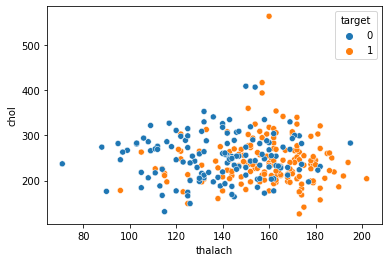

In [12]:
sns.scatterplot(data =df, x ='thalach', y ='chol',hue='target')

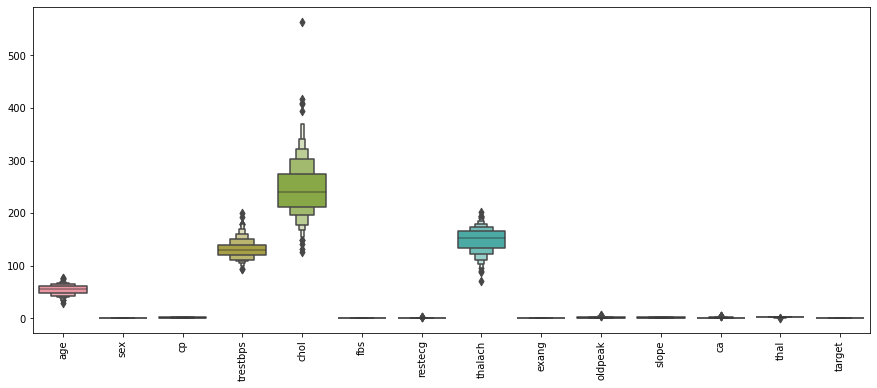

In [13]:
# this plot shows cholestrol has an outlier but it will not make much difference if we remove it 
# because its correlation with target is insignificant as shown in the heatmap above

plt.figure(figsize = (15,6))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

### Removing outliers in chol (not necessary)

In [14]:
df.loc[df['chol']==df['chol'].max()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [15]:
df.drop(85, axis = 0, inplace = True)

### Scaling the features using Standard Scaler (not taken in model training)

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.


In [16]:
X = df.drop(columns = 'target')
y = df['target']

In [17]:
X_standardized = StandardScaler().fit_transform(X) 
X_standardized

array([[ 0.95831542,  0.67744904,  1.97647049, ..., -2.27455518,
        -0.71621621, -2.14609717],
       [-1.91370468,  0.67744904,  1.005911  , ..., -2.27455518,
        -0.71621621, -0.50942711],
       [-1.47185543, -1.4761258 ,  0.0353515 , ...,  0.97327302,
        -0.71621621, -0.50942711],
       ...,
       [ 1.51062697,  0.67744904, -0.93520799, ..., -0.65064108,
         1.24122539,  1.12724296],
       [ 0.29554155,  0.67744904, -0.93520799, ..., -0.65064108,
         0.26250459,  1.12724296],
       [ 0.29554155, -1.4761258 ,  0.0353515 , ..., -0.65064108,
         0.26250459, -0.50942711]])

In [18]:
X_standardized = pd.DataFrame(X_standardized, columns = list(X.columns))
X_standardized

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.958315,0.677449,1.976470,0.760692,-0.251858,2.389793,-1.009188,0.016920,-0.698344,1.087561,-2.274555,-0.716216,-2.146097
1,-1.913705,0.677449,1.005911,-0.095866,0.098749,-0.418446,0.895654,1.632825,-0.698344,2.121487,-2.274555,-0.716216,-0.509427
2,-1.471855,-1.476126,0.035352,-0.095866,-0.849951,-0.418446,-1.009188,0.977728,-0.698344,0.312118,0.973273,-0.716216,-0.509427
3,0.185079,0.677449,0.035352,-0.666905,-0.189986,-0.418446,0.895654,1.239767,-0.698344,-0.204845,0.973273,-0.716216,-0.509427
4,0.295542,-1.476126,-0.935208,-0.666905,2.243636,-0.418446,0.895654,0.584670,1.431958,-0.377166,0.973273,-0.716216,-0.509427
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.295542,-1.476126,-0.935208,0.475172,-0.086866,-0.418446,0.895654,-1.162254,1.431958,-0.721808,-0.650641,-0.716216,1.127243
298,-1.030006,0.677449,1.976470,-1.237944,0.387484,-0.418446,0.895654,-0.769196,-0.698344,0.139797,-0.650641,-0.716216,1.127243
299,1.510627,0.677449,-0.935208,0.703588,-1.076814,2.389793,0.895654,-0.376138,-0.698344,2.035326,-0.650641,1.241225,1.127243
300,0.295542,0.677449,-0.935208,-0.095866,-2.355497,-0.418446,0.895654,-1.511639,1.431958,0.139797,-0.650641,0.262505,1.127243


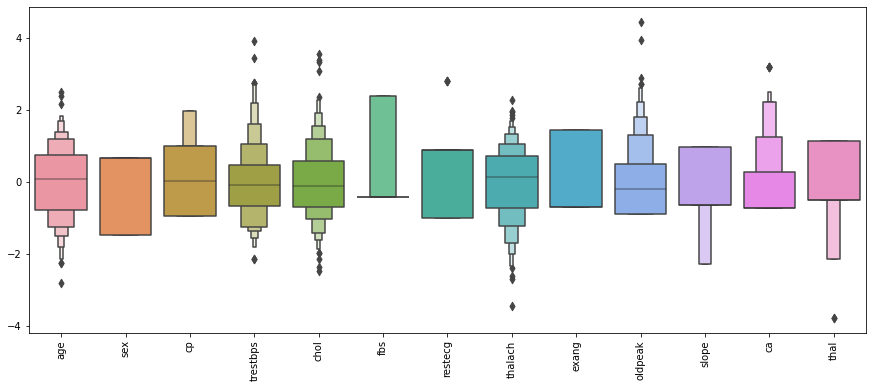

In [19]:
# visualizing the scaled features

plt.figure(figsize = (15,6))
sns.boxenplot(data = X_standardized)
plt.xticks(rotation = 90)
plt.show()

### Train Test Split, Model Building

In [20]:
# duplicates not dropped, outlier dropped, X standardized

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2, random_state = 13, stratify = y)

In [28]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [29]:
print(f"SVM training accuracy: {model.score(X_train, y_train)}")  
print(f"SVM testing accuracy: {model.score(X_test, y_test)}\n") 

SVM training accuracy: 0.9004149377593361
SVM testing accuracy: 0.9508196721311475



In [30]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.97      0.94      0.95        33

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



<AxesSubplot: >

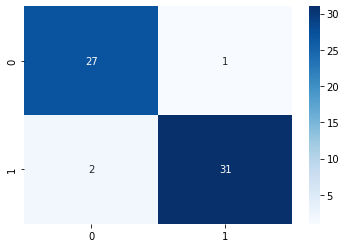

In [31]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot = True, cmap = 'Blues')

In [32]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

#### Prediction system

In [33]:
data = [[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]

In [34]:
sample_df = pd.DataFrame(data,columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])

In [35]:
sample_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [36]:
output = model.predict(sample_df)

In [37]:
output

array([1], dtype=int64)

#### Saving the model (Pickling)

In [42]:
import pickle

In [43]:
filename = 'model_file.pkl';

In [44]:
pickle.dump(model, open(filename, 'wb'))    # write permission # model is the svm models name

In [45]:
# loading the model 

load_model = pickle.load(open(filename, 'rb'))

In [45]:
# trying it out on a test set

load_model.score(X_test,y_test)

0.9508196721311475